In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\lokes\Documents\GitHub\Surprise-Housing-Price-Prediction-Project--Flip-Robo\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
dft=pd.read_csv(r'C:\Users\lokes\Documents\GitHub\Surprise-Housing-Price-Prediction-Project--Flip-Robo\test.csv')
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

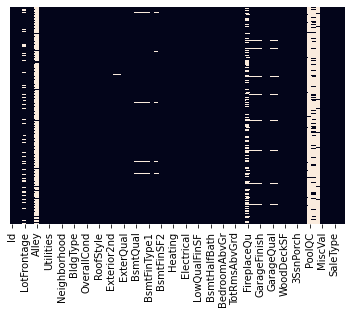

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1168, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
dtype: int64

In [9]:
#PopolQC NA stands for No Pool
df['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
df['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
df['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
df['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    df[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    df[j].fillna('No_Basement',inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     214
GarageYrBlt      64
MasVnrType        7
MasVnrArea        7
KitchenAbvGr      0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
Id                0
GarageFinish      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
dtype: int64

In [11]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [12]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')

In [13]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

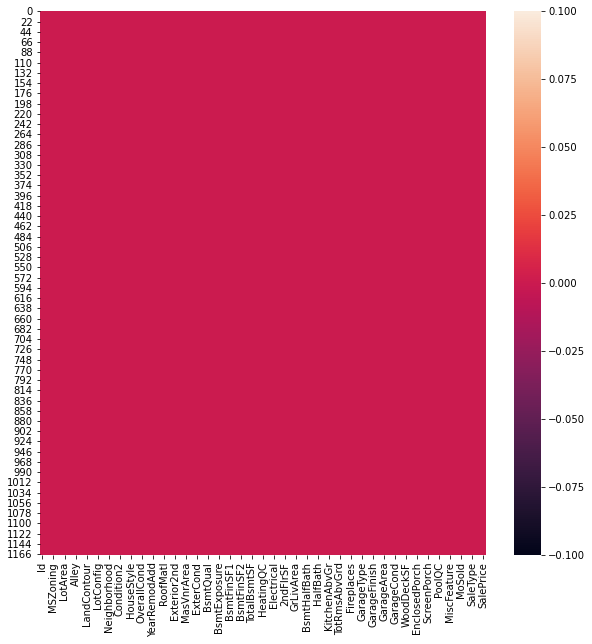

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull());

In [16]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [17]:
dft.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageCond       17
GarageFinish     17
BsmtCond          7
BsmtFinType2      7
BsmtFinType1      7
BsmtQual          7
BsmtExposure      7
MasVnrArea        1
MasVnrType        1
Electrical        1
HalfBath          0
dtype: int64

In [18]:
#PopolQC NA stands for No Pool
dft['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
dft['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
dft['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
dft['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
dft['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    dft[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    dft[j].fillna('No_Basement',inplace=True)

In [19]:
dft['LotFrontage'].fillna(dft['LotFrontage'].median(),inplace=True)
dft['MasVnrArea'].fillna(dft['MasVnrArea'].median(),inplace=True)

In [20]:
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna('0')
dft['MasVnrType'] = dft['MasVnrType'].fillna('None')
dft['Electrical'] = dft['Electrical'].fillna('mode')

In [21]:
dft.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
dtype: int64

In [22]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


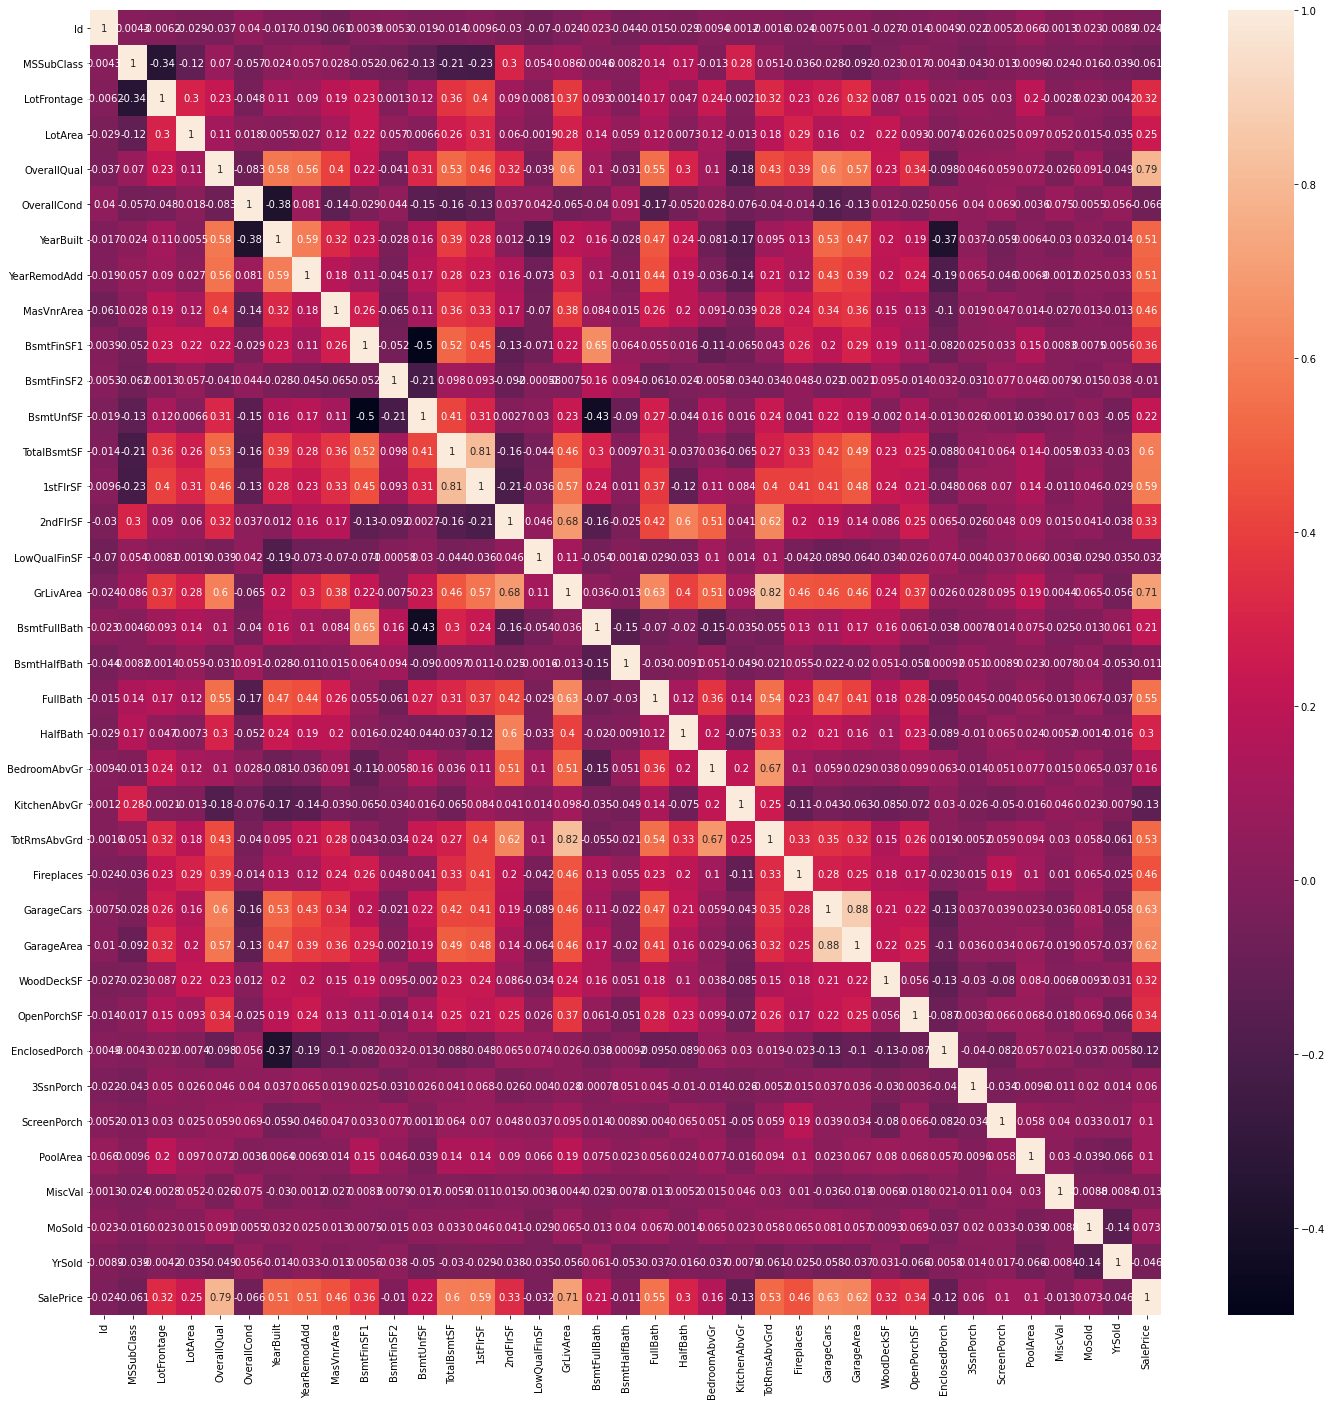

In [23]:
cor=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(cor,annot=True)
plt.show()

Text(0.5, 1.0, 'Mean House Price vs YearSold')

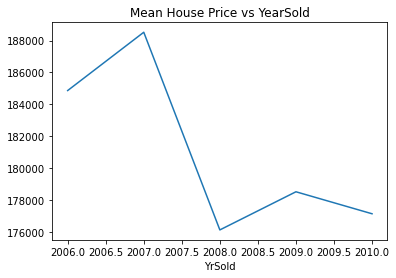

In [24]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

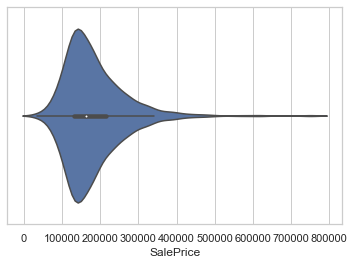

In [25]:
sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

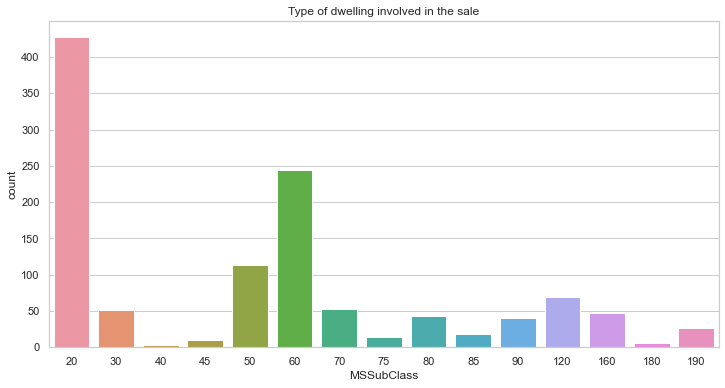

In [26]:
plt.figure(figsize=[12,6])
sns.countplot(df.MSSubClass)
plt.title('Type of dwelling involved in the sale')
plt.show()

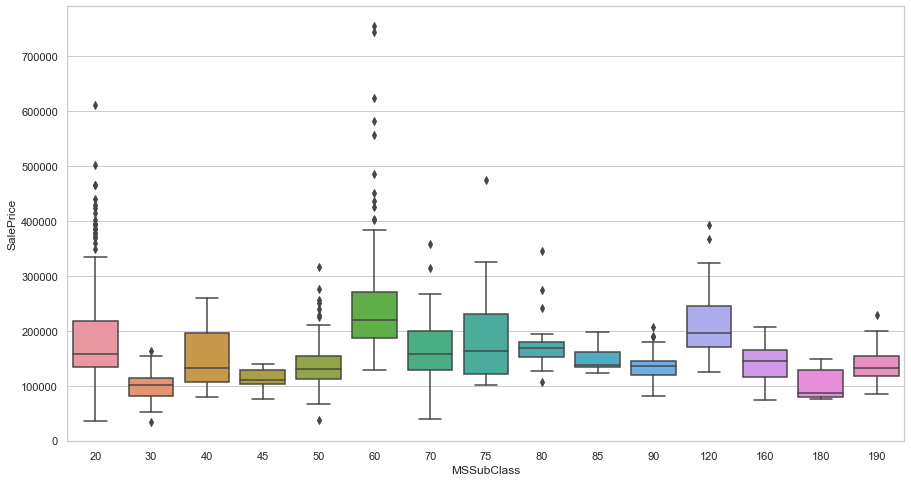

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df.sort_values('SalePrice',ascending=False))
plt.show()

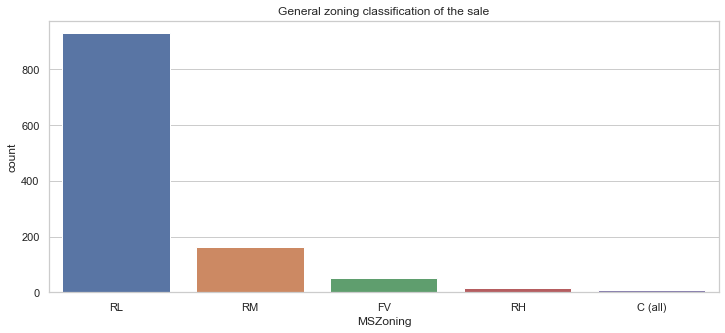

In [28]:
plt.figure(figsize=[12,5])
sns.countplot(df.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

<Figure size 864x576 with 0 Axes>

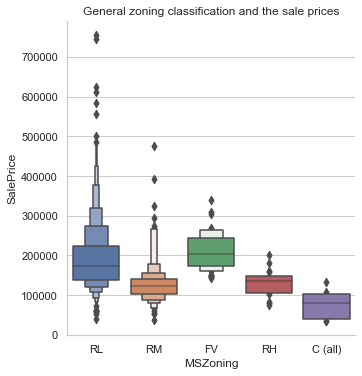

In [29]:
plt.figure(figsize=[12,8])
sns.catplot(x='MSZoning', y='SalePrice',data=df.sort_values('SalePrice',ascending=False), kind='boxen')
plt.title('General zoning classification and the sale prices')
plt.show()

Observations:

For Residential Low Density(RL),the maximum prices are ranging between 50,000 to 4,00000.


For Floating village Residential(FV),the maximum prices are ranging between 150000 to 250000.

In [30]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

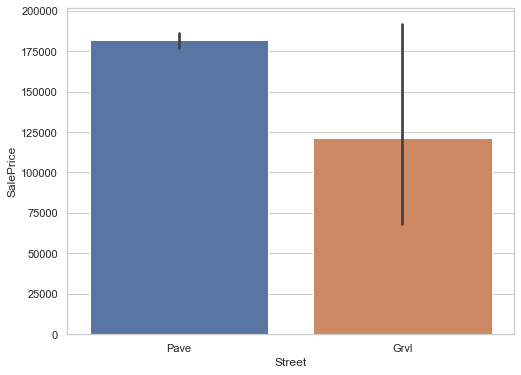

In [31]:
plt.figure(figsize=[8,6])
sns.barplot(x='Street', y='SalePrice', data = df.sort_values('SalePrice', ascending=False))

plt.show()

we can observe that the property with the road access of pave is in more demand and so its price is also high.

<AxesSubplot:ylabel='Alley'>

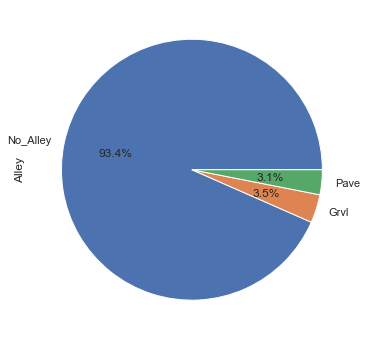

In [32]:
plt.figure(figsize=[6,6])
df['Alley'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 94% property have no alley acess.

<Figure size 576x432 with 0 Axes>

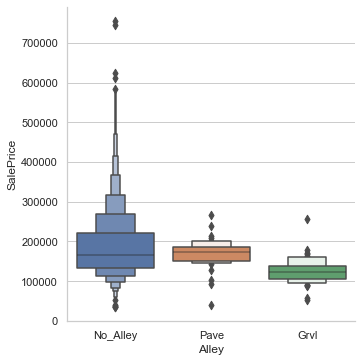

In [33]:
plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<AxesSubplot:ylabel='LotShape'>

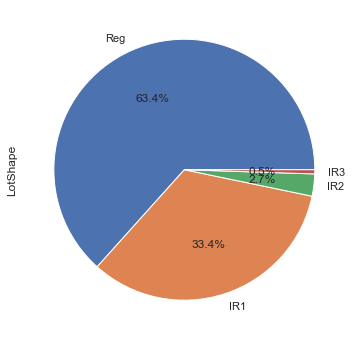

In [34]:
plt.figure(figsize=[6,6])
df['LotShape'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

We can see that most of the properties are of regular shape (approx 63%).Approx 33% properties are of slightly irregular shape.

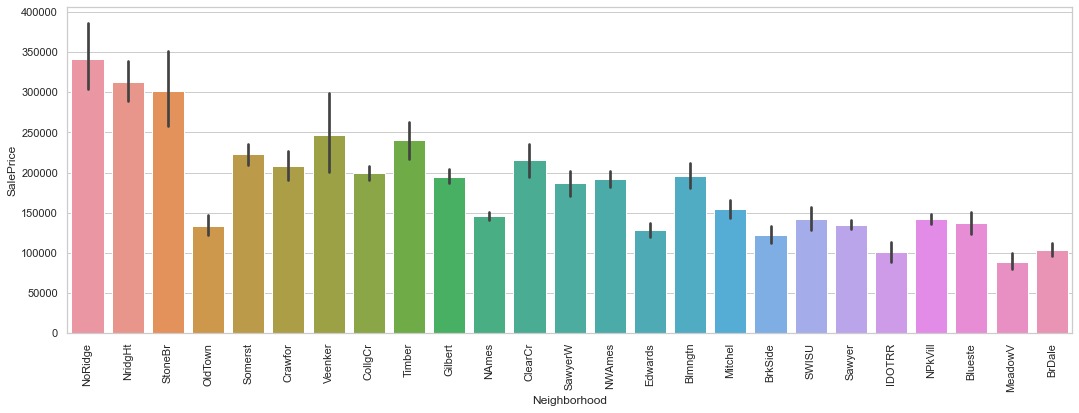

In [35]:
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

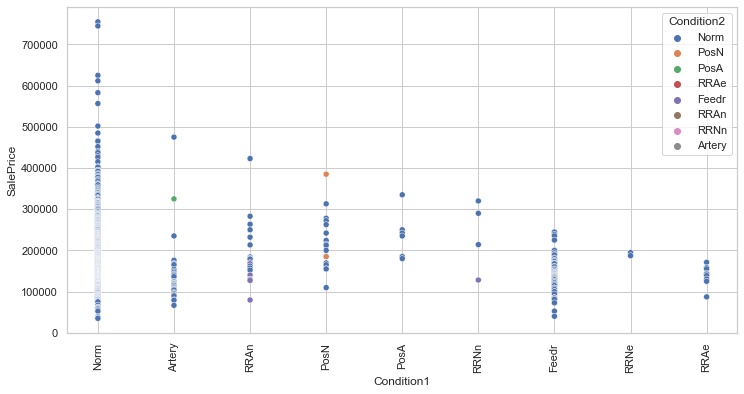

In [36]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

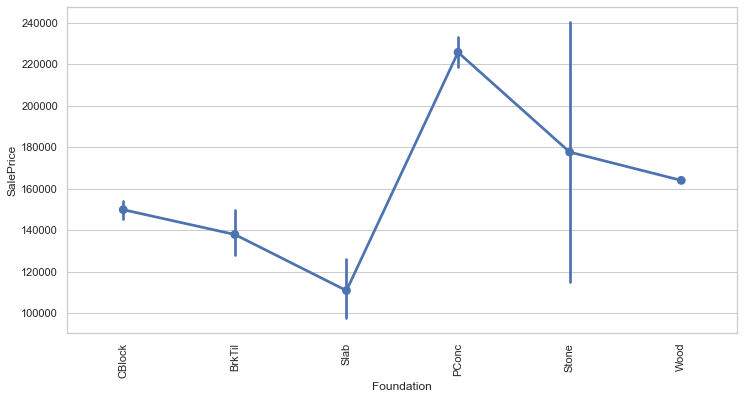

In [37]:
plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

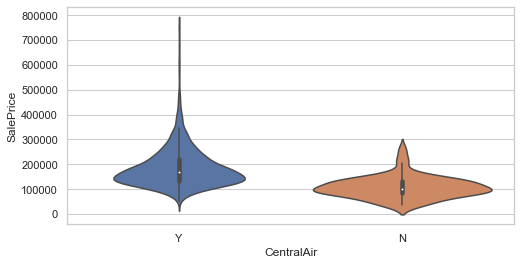

In [38]:
plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

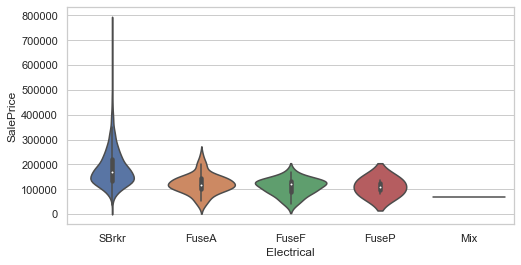

In [39]:
plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

SBrkr Standard Circuit Breakers & Romex

FuseA Fuse Box over 60 AMP and all Romex wiring (Average)

FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)

FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)

Mix Mixed

Most of the houses are having the electrical system of standard circuit breakers and romex.

In [40]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,1977.0,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,1970.0,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,1997.0,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1977.0,RFn,TA,TA,Y,No_Pool,MnPrv,None,COD,Normal
4,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,1977.0,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


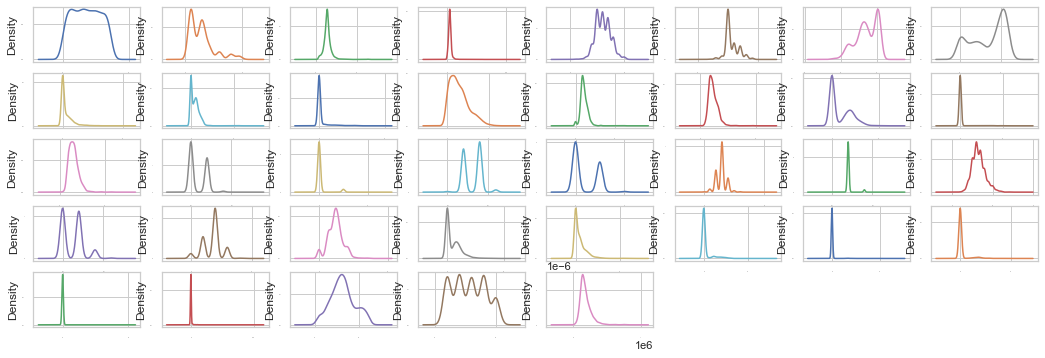

In [41]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

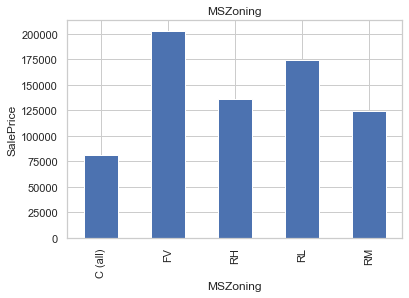

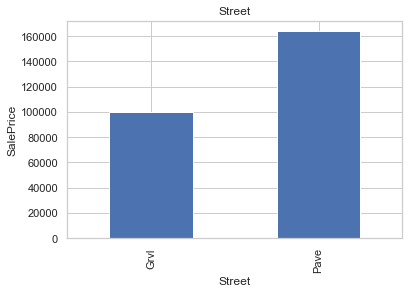

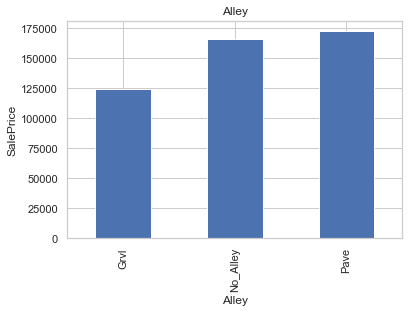

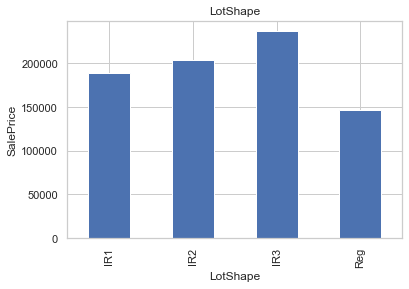

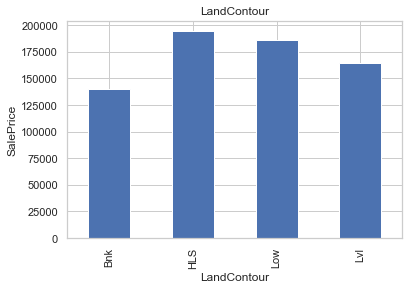

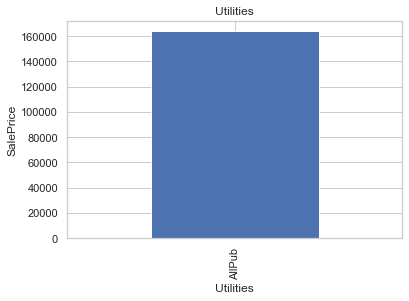

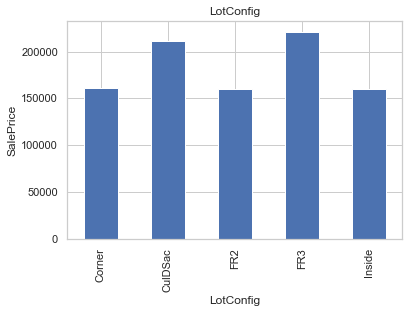

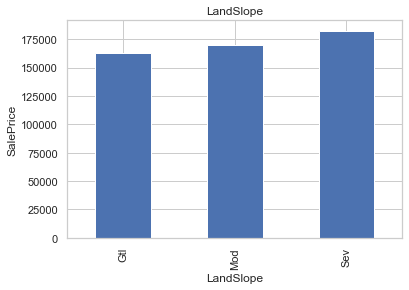

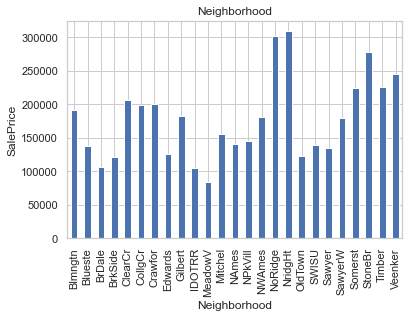

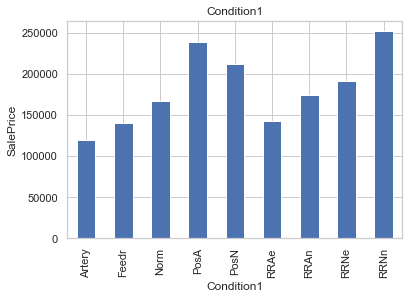

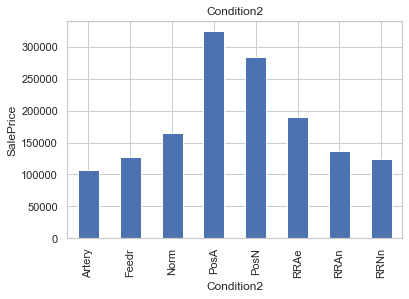

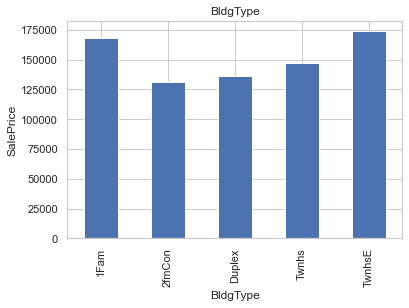

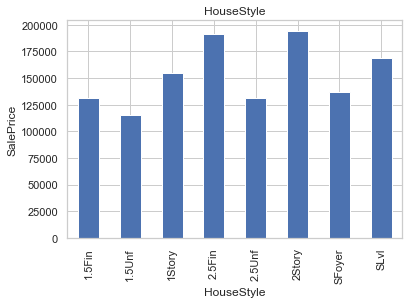

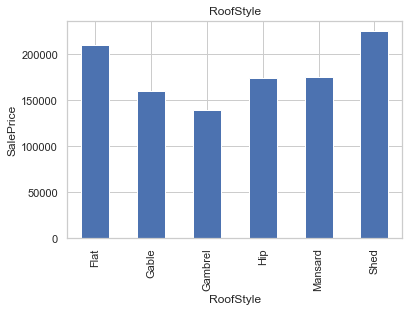

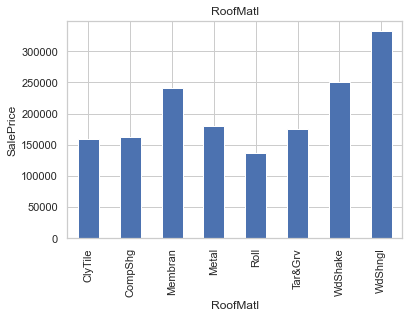

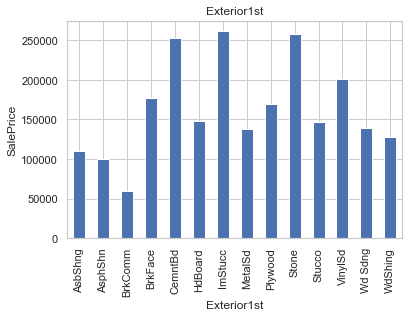

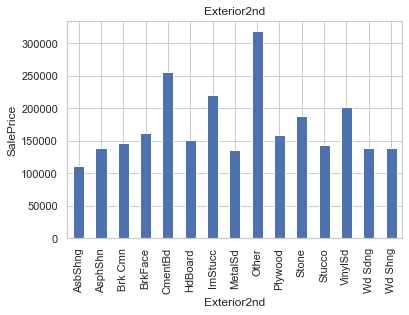

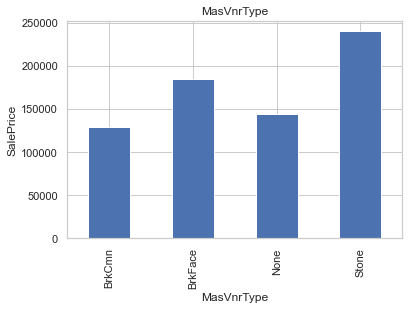

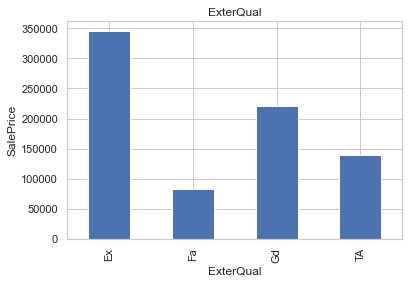

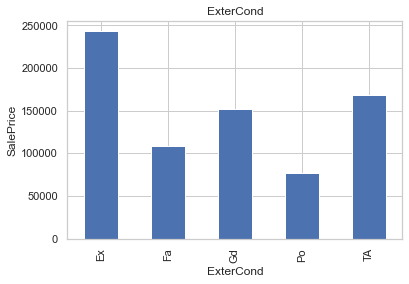

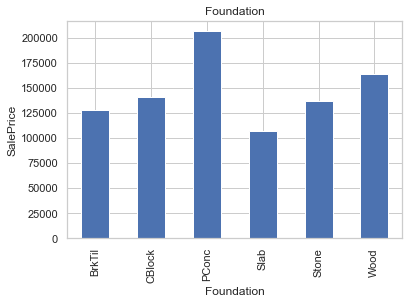

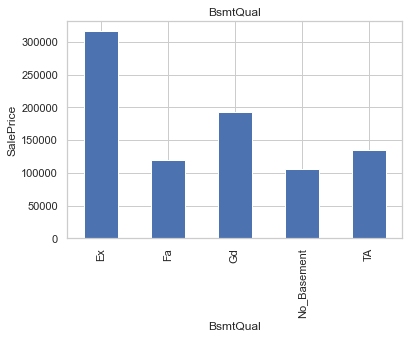

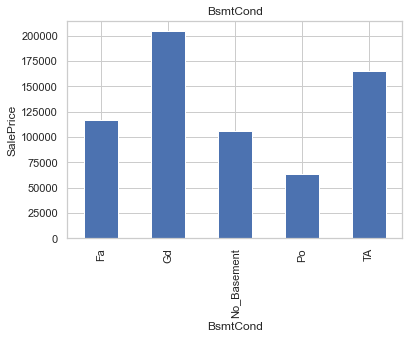

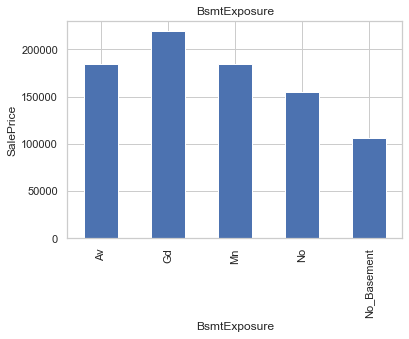

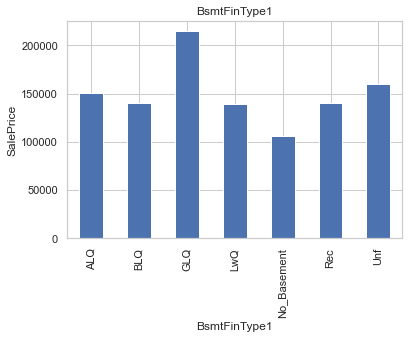

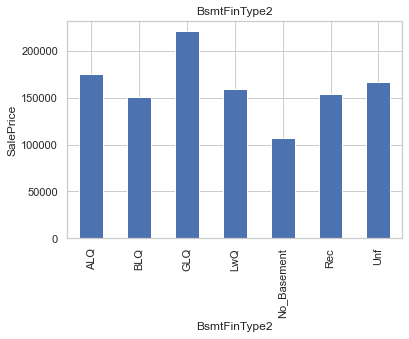

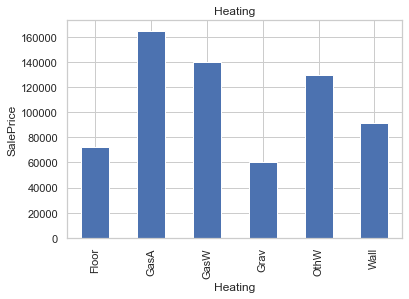

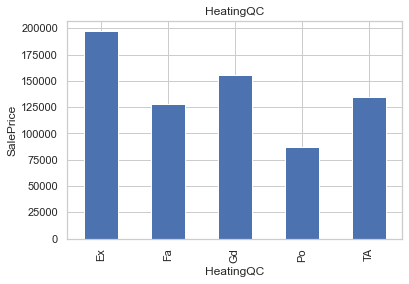

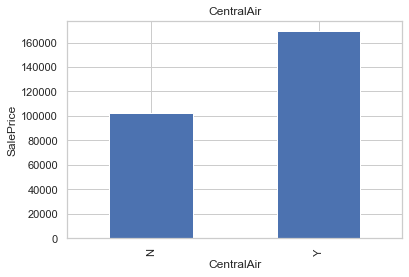

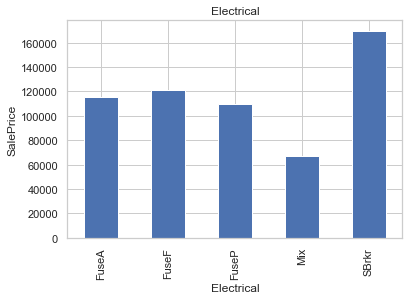

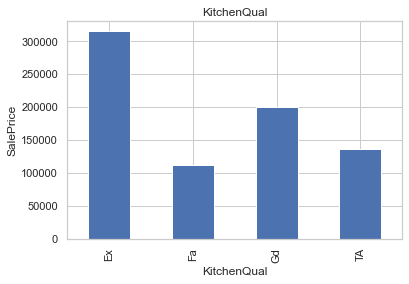

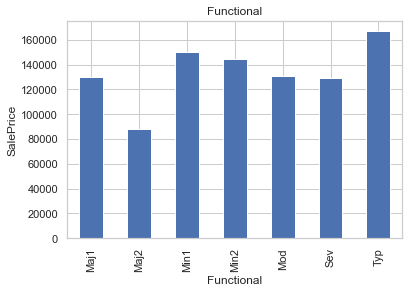

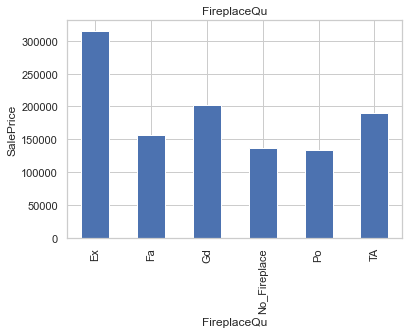

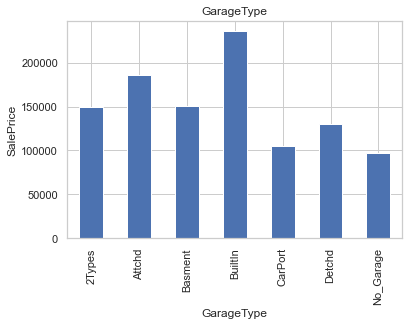

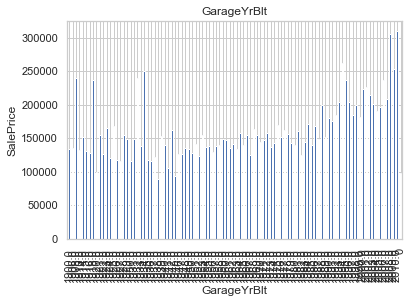

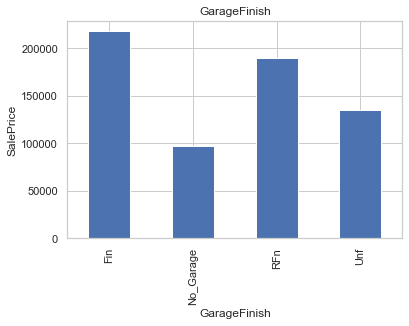

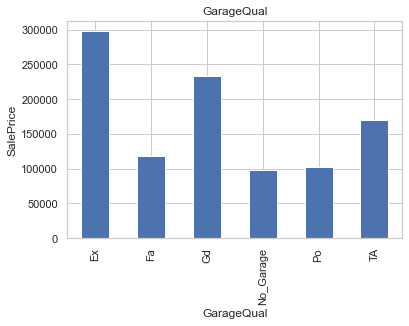

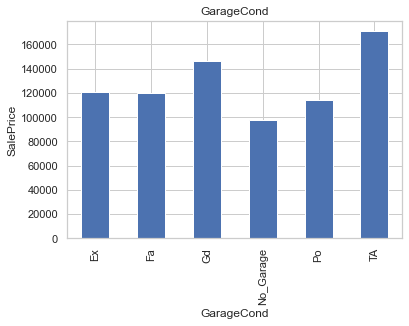

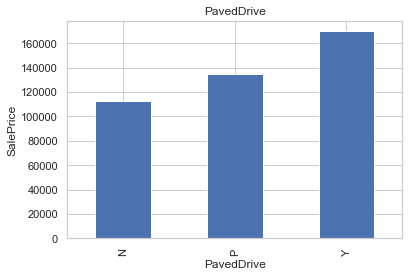

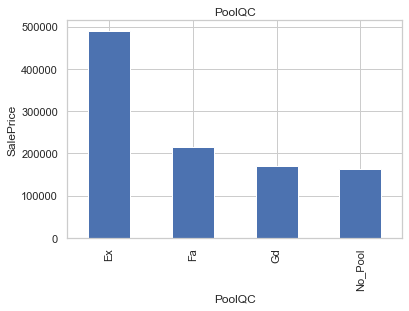

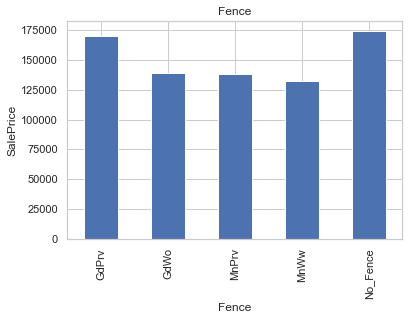

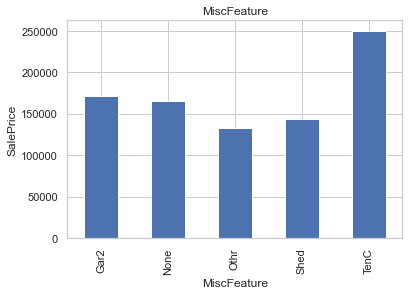

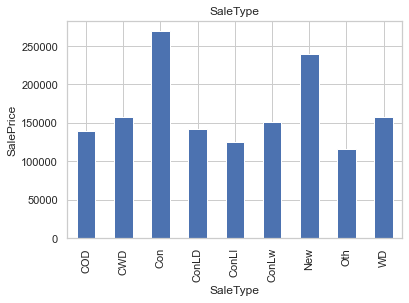

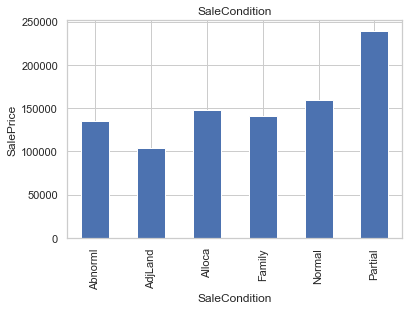

In [42]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [43]:
df.drop(['Id'], axis = 1,inplace=True)

In [44]:
dft.drop(['Id'], axis = 1,inplace=True)

In [45]:
df.skew()

MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [46]:
numerical_feature=[feature for feature in df.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 36


In [47]:
for col in df[numerical_feature].columns:
    if df.skew().loc[col]>0.55 and col!='SalePrice':
        df[col]=np.log1p(df[col])

In [48]:
df.skew()

MSSubClass        0.235373
LotFrontage      -0.793980
LotArea          -0.169107
OverallQual       0.175082
OverallCond      -0.418916
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.518966
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.071926
Fireplaces        0.188280
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [49]:
numerical_feature=[feature for feature in dft.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 35


In [50]:
for col in dft[numerical_feature].columns:
    if dft.skew().loc[col]>0.55:
        dft[col]=np.log1p(dft[col])

In [51]:
dft.skew()

MSSubClass        0.301590
LotFrontage       0.499491
LotArea          -0.016494
OverallQual       0.397312
OverallCond       0.606771
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.444701
BsmtFinSF1       -0.668665
BsmtFinSF2        2.622732
BsmtUnfSF        -2.454060
TotalBsmtSF       0.519257
1stFlrSF         -0.013105
2ndFlrSF          0.292337
LowQualFinSF      9.820031
GrLivArea        -0.022042
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.661487
BedroomAbvGr      0.075315
KitchenAbvGr      4.548551
TotRmsAbvGrd      0.017772
Fireplaces        0.540164
GarageYrBlt      -3.776995
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        0.244705
OpenPorchSF      -0.100802
EnclosedPorch     2.258484
3SsnPorch        12.028006
ScreenPorch       3.363599
PoolArea          0.000000
MiscVal           5.232903
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   float64
 18  YearBuil

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])

NameError: name 'categorical_features' is not defined

In [ ]:
categorical_features=[feature for feature in dft.columns if dft[feature].dtypes=='O']
dft[categorical_features].head()

In [ ]:
dft.info()

In [ ]:
categorical_features=[feature for feature in dft.columns if dft[feature].dtypes=='O']
dft[categorical_features].head()

In [ ]:
categorical_features

In [ ]:
le = LabelEncoder()
for i in categorical_features:
    dft[i]=le.fit_transform(dft[i])

In [ ]:
x=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
X=pd.DataFrame(sc_x,columns=x.columns)

In [ ]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=181)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
LR=LinearRegression()
LR.fit(x_train, y_train)
print(LR.score(x_train, y_train))
LR_predict=LR.predict(x_test)

In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

In [ ]:
#Hyper parameter tuning
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [ ]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [ ]:
RF_grid.best_params_

In [ ]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [ ]:
print(rf.score(x_train,y_train))

In [ ]:
import joblib
joblib.dump(rf,'House.pkl')

In [ ]:
dft

In [ ]:
sc=StandardScaler()
sc_x=sc.fit_transform(dft)
x=pd.DataFrame(sc_x,columns=dft.columns)

In [ ]:
model=joblib.load('Housing_Project.pkl')

In [ ]:
import sys
nums= model.predict(x)
np.set_printoptions(threshold=sys.maxsize)
print(nums)